In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

### Read In CSVs

In [2]:
raw_combine_data=pd.read_csv('Resources/raw_combine_data.csv')
raw_nba_data=pd.read_csv('Resources/raw_nba_data.csv')

### Finding Duplicates

In [3]:
nba_duplicates=raw_nba_data[raw_nba_data.duplicated(['PLAYER'])]
combine_duplicates=raw_combine_data[raw_combine_data.duplicated(['PLAYER'])]

### Drop Duplicates from Dataframes

In [4]:
dropped_combine_data=raw_combine_data.drop_duplicates(subset='PLAYER',keep='first')
dropped_nba_data=raw_nba_data.drop_duplicates(subset='PLAYER',keep='first')

### Merge DataFrames

In [5]:
merged_data_df=dropped_combine_data.merge(dropped_nba_data, on='PLAYER')

### Drop Rows w/ Missing Wingspan Data

In [6]:
merged_data_df=merged_data_df[merged_data_df['3PA']>10]
merged_data_df=merged_data_df[merged_data_df['2PA']>10]
merged_data_df=merged_data_df[merged_data_df['FTA']>10]

merged_data_df=merged_data_df.dropna(subset=['WINGSPAN'])
merged_data_df=merged_data_df.dropna(subset=['HEIGHT\xa0W/O\xa0SHOES'])

merged_data_df.reset_index(inplace=True)
merged_data_df.drop(axis=1, labels='index', inplace=True)

### Export as CSV

In [7]:
merged_data_df.to_csv("Resources/merged_data.csv")

In [8]:
wingspan = []
wingspan_convert = []

height_wo_shoes = []
height_wo_shoes_convert = []

wingspan = merged_data_df['WINGSPAN']
height_wo_shoes = merged_data_df['HEIGHT\xa0W/O\xa0SHOES']
wingspan_list = wingspan.tolist()
height_wo_shoes_list = height_wo_shoes.tolist()

for wingspan in wingspan_list:
    wingspan_cleaned = wingspan.strip("'").split("'")
    wingspan_convert.append((float(wingspan_cleaned[0])*12)+float(wingspan_cleaned[1]))

for height_wo_shoes in height_wo_shoes_list:
    height_wo_shoes_cleaned = height_wo_shoes.strip("'").split("'")
    height_wo_shoes_convert.append((float(height_wo_shoes_cleaned[0])*12)+float(height_wo_shoes_cleaned[1]))

In [9]:
#Does ratio have an effect on determining free throw success?  
# ratio vs ft% -variable 1
# ratio vs 2pt% -variable 2 
# ratio vs 3pt % - variable 3

ratio_wing_over_height = []

for i in range(len(wingspan_convert)):
    ratio_wing_over_height.append(wingspan_convert[i] / height_wo_shoes_convert[i])
   

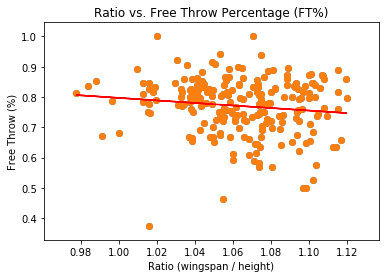

In [28]:
#scatter plots

plt.scatter(ratio_wing_over_height,merged_data_df["FT%"])

correlation_coefficient = st.pearsonr(ratio_wing_over_height, merged_data_df['FT%'])[0]
(slope, intercept, r_value, p_value, standard_error) = st.linregress(ratio_wing_over_height, merged_data_df['FT%'])

y = slope * np.array(ratio_wing_over_height) + intercept

plt.scatter(x = ratio_wing_over_height, y = merged_data_df['FT%'])
plt.xlabel('Ratio (wingspan / height)')
plt.ylabel('Free Throw (%)')
plt.title('Ratio vs. Free Throw Percentage (FT%)')

plt.plot(ratio_wing_over_height, y, color = 'red')
plt.show()


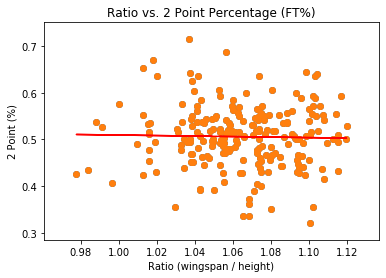

In [29]:
plt.scatter(ratio_wing_over_height,merged_data_df["2P%"])

correlation_coefficient = st.pearsonr(ratio_wing_over_height, merged_data_df['2P%'])[0]
(slope, intercept, r_value, p_value, standard_error) = st.linregress(ratio_wing_over_height, merged_data_df['2P%'])

y = slope * np.array(ratio_wing_over_height) + intercept

plt.scatter(x = ratio_wing_over_height, y = merged_data_df['2P%'])
plt.xlabel('Ratio (wingspan / height)')
plt.ylabel('2 Point (%)')
plt.title('Ratio vs. 2 Point Percentage (FT%)')

plt.plot(ratio_wing_over_height, y, color = 'red')
plt.show()

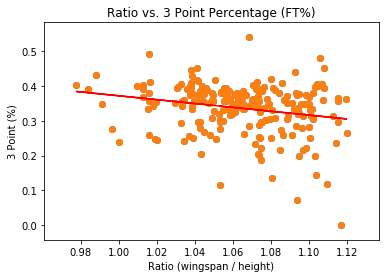

In [30]:
plt.scatter(ratio_wing_over_height,merged_data_df["3P%"])

(correlation_coefficient) = st.pearsonr(ratio_wing_over_height, merged_data_df['3P%'])[0]
(slope, intercept, r_value, p_value, standard_error) = st.linregress(ratio_wing_over_height, merged_data_df['3P%'])

y = slope * np.array(ratio_wing_over_height) + intercept

plt.scatter(x = ratio_wing_over_height, y = merged_data_df['3P%'])
plt.xlabel('Ratio (wingspan / height)')
plt.ylabel('3 Point (%)')
plt.title('Ratio vs. 3 Point Percentage (FT%)')

plt.plot(ratio_wing_over_height, y, color = 'red')
plt.show()

In [ ]:
# If you're a small guard you're taking a lot of 3P shot to overcome height disadvantage 
# or increased risk of blocked shots cloer to rim. The flat line may also indicate however
# if you have a higher wingspan to height ratio you're able t shoot over perimeter defenders
# or guards as a result of having a longer wingspan making it harder to block the 3P shot

In [ ]:
## Review slides of presentation requisites
## Addition of data: Variables aside from FT%, 2P%, 3P%?  
## Expansion of data: Teams, Highlight notable players, Positions of players
## Utilize additional graph plots histograms, bar graphs, etc. with different ratios?